In [2]:
import gzip
import json
import os

raw_adverts = []
for root, dirs, files in os.walk('../database/autovit/adverts/'):
    for name in files:
        file = os.path.join(root, name)
        with gzip.open(file, 'r') as fin:
            raw_adverts.extend(json.loads(fin.read().decode('utf-8')))

raw_adverts[0].pop('photos', None)
raw_adverts[0]

{'id': '7044507895',
 'region_id': '9',
 'region_name': 'Galati',
 'city_id': '76959',
 'city_name': 'Galati',
 'district_id': '',
 'district_name': '',
 'new_used': 'used',
 'url': 'https://www.autovit.ro/anunt/bmw-x1-ID7GK2j5.html',
 'preview_url': 'https://www.autovit.ro/i2/anunt/bmw-x1-ID7GK2j5.html?json=1&isPreview=1',
 'title': 'BMW X1',
 'title_description_full': 'BMW X1',
 'created': 'Ieri 20:11',
 'age': 0,
 'description': 'Bmw X1 - Model facelift \r\nMotorizare 2.0 diesel - 190 cp\r\nXdrive - tractiune integrala\r\nCutie viteze automata cu selectorul nou\r\nSenzor impact\r\nSenzori avertizare schimbare banda\r\nSenzor detectare pietoni\r\nSenzori mentinere distanta auto in oras\r\nPortbagaj electric\r\nKeyless entry / keyless go\r\nCamera marsarier\r\nSenzori deschidere portbagaj cu piciorul\r\nPark tronic - parcheaza singura\r\nScaune sport\r\nIncalzire in scaune\r\nIncalzire in volan\nIncalzire auxiliara\r\nFaruri BiXenon adaptive\r\nDay light Angel Eyes\r\nAsistenta faza l

In [36]:
import re

def strip_nr(str_nr):
    if str_nr is not None:
        return int(re.sub(r'[^0-9]+', '', str_nr))
    else:
        raise TypeError

def get_listing_param(data, name):
    for p in data['listing_params']:
        if p[0] == name:
            return p[1]
    else:
        return None


reshaped_adverts = []
for ad in raw_adverts:
    # reshape params data
    if 'params' in ad:
        for p in ad['params']:
            ad[p[0]] = p[1]
        # pop extra params
        ad.pop('params', None)
    
    # reshape feature paras
    if 'features' in ad:
        for f in ad['features']:
            ad[f] = True
        # pop extra features
        ad.pop('features', None)
    
    # format price as int only
    if 'list_label' in ad:
        ad['price'] = strip_nr(ad['list_label'])
        ad.pop('list_label', None)
    
    
    ad['fabrication_year'] = strip_nr(get_listing_param(ad, 'Anul fabricatiei'))
    ad['kilometers'] = strip_nr(get_listing_param(ad, 'Kilometraj'))
    ad['fuel'] = get_listing_param(ad, 'Combustibil').lower()
    cc = get_listing_param(ad, 'Capacitate cilindrica')
    if cc is not None:
        cc = strip_nr(cc)
        ad['cubic_capacity'] = cc
    
   
    # pop unused keys
    ad.pop('photos', None)
    ad.pop('description', None)
    
    reshaped_adverts.append(ad)

reshaped_adverts[0]

{'id': '7044507895',
 'region_id': '9',
 'region_name': 'Galati',
 'city_id': '76959',
 'city_name': 'Galati',
 'district_id': '',
 'district_name': '',
 'new_used': 'used',
 'url': 'https://www.autovit.ro/anunt/bmw-x1-ID7GK2j5.html',
 'preview_url': 'https://www.autovit.ro/i2/anunt/bmw-x1-ID7GK2j5.html?json=1&isPreview=1',
 'title': 'BMW X1',
 'title_description_full': 'BMW X1',
 'created': 'Ieri 20:11',
 'age': 0,
 'highlighted': 0,
 'urgent': 0,
 'topAd': 1,
 'category_id': 29,
 'ad_packages': '',
 'ad_features': ['add_olx', 'topads_15'],
 'subtitle': [],
 'business': 0,
 'hide_user_ads_button': 0,
 'has_dealer_page_feature': False,
 'status': 'active',
 'dealer_logo_in_results': 0,
 'dealer_logo_in_ad_page': 0,
 'dealer_logo': '',
 'stand_id': '',
 'map_address': '',
 'external_partner_code': '',
 'partner_offer_url': '',
 'fuel_type': {'key': 'diesel', 'value': 'Diesel'},
 'is_promoted': True,
 'dealer_info': {'userType': 'Privat',
  'phones': ['074'],
  'userRegistrationDate': '2

In [37]:
import pandas as pd

df = pd.DataFrame(reshaped_adverts)
df.describe()

,age,highlighted,urgent,topAd,category_id,business,hide_user_ads_button,dealer_logo_in_results,dealer_logo_in_ad_page,has_phone,has_email,map_radius,map_private_radius_size,ad_featured,price,fabrication_year,kilometers,cubic_capacity
count,1072.000000,1072.0,1072.0,1072.000000,1072.0,1072.000000,1072.0,1072.000000,1072.000000,1062.0,1072.0,1072.000000,1072.0,1072.0,1072.000000,1072.000000,1.072000e+03,1035.000000
mean,52.907649,0.0,0.0,0.101679,29.0,0.430037,0.0,0.328358,0.363806,1.0,1.0,0.060634,2.0,0.0,15139.886194,2012.514925,1.652151e+05,19745.917874
std,122.916807,0.0,0.0,0.302367,0.0,0.495312,0.0,0.469835,0.481318,0.0,0.0,0.238770,0.0,0.0,21720.147241,4.834880,1.021183e+05,5888.833579
min,0.000000,0.0,0.0,0.000000,29.0,0.000000,0.0,0.000000,0.000000,1.0,1.0,0.000000,2.0,0.0,20.000000,1982.000000,1.000000e+00,7993.000000
25%,0.000000,0.0,0.0,0.000000,29.0,0.000000,0.0,0.000000,0.000000,1.0,1.0,0.000000,2.0,0.0,4950.000000,2009.000000,1.049355e+05,15983.000000
50%,0.000000,0.0,0.0,0.000000,29.0,0.000000,0.0,0.000000,0.000000,1.0,1.0,0.000000,2.0,0.0,8600.000000,2013.000000,1.710000e+05,19683.000000
75%,44.250000,0.0,0.0,0.000000,29.0,1.000000,0.0,1.000000,1.000000,1.0,1.0,0.000000,2.0,0.0,16825.000000,2016.000000,2.240000e+05,19983.000000
max,1316.000000,0.0,0.0,1.000000,29.0,1.000000,0.0,1.000000,1.000000,1.0,1.0,1.000000,2.0,0.0,260049.000000,2021.000000,2.000000e+06,61623.000000


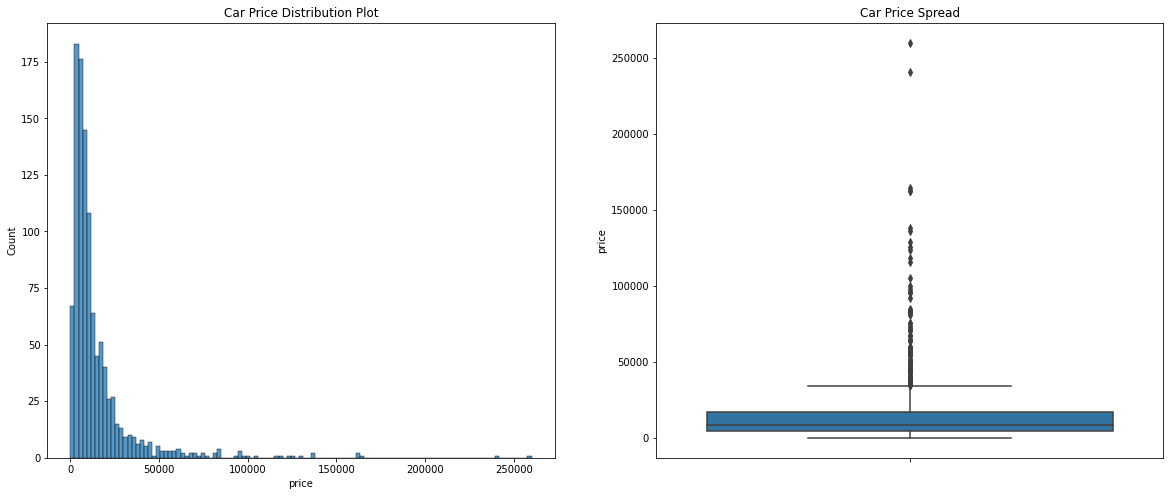

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sea

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.title('Car Price Distribution Plot')
sea.histplot(df['price'])

plt.subplot(1, 2, 2)
plt.title('Car Price Spread')
sea.boxplot(y=df['price'])

plt.show()

<AxesSubplot:xlabel='kilometers'>

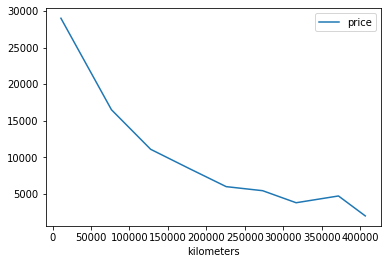

In [39]:
import pandas as pd
import numpy as np


km_bins = np.arange(0, 500000, 50000)
km = df.groupby(
    pd.cut(df['kilometers'], km_bins)
).median()
km.plot.line(x='kilometers', y='price')

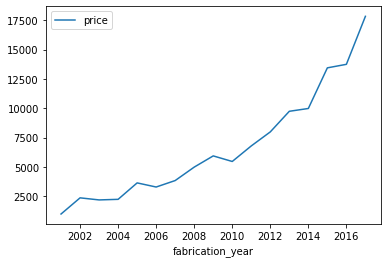

In [40]:
ys_bins = np.arange(2000, 2018, 1)
ys = df.groupby(
    pd.cut(df['fabrication_year'], ys_bins)
).median()
ys.plot(x='fabrication_year', y='price')
plt.show(block=True)

In [50]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X = df.loc[:, ('fabrication_year', 'kilometers')]
y = df['price']

X.loc[:, ('fabrication_year', 'kilometers')] = scale.fit_transform(X[['fabrication_year', 'kilometers']].values)

# print(X.isnull().sum())
model = sm.OLS(y, X, missing='drop').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.208
Model:                            OLS   Adj. R-squared (uncentered):              0.206
Method:                 Least Squares   F-statistic:                              140.3
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                    7.98e-55
Time:                        20:09:25   Log-Likelihood:                         -12313.
No. Observations:                1072   AIC:                                  2.463e+04
Df Residuals:                    1070   BIC:                                  2.464e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fabrication_year  9149.1105    853.524     10.719      0.000    7474.340    1.08e+04
kilometers       -4359.1276    853.524     -5.107      0.000   -6033.899   -2684.357
==============================================================================
Omnibus:                     1176.497   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98980.286
Skew:                           5.288   Prob(JB):                         0.00
Kurtosis:                      48.871   Cond. No.                         1.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
car = [2002, 250000]

scaled_car = scale.transform([car])
prediction = model.predict(scaled_car[0])

print('Estimated market price: %d EUR' % int(prediction))

ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)